In [1]:
import sys


In [2]:
sys.path.append("/home/dalton/environments/Gillespy2/Repository/gillespy2")

In [3]:
sys.path


['',
 '/usr/lib/python35.zip',
 '/usr/lib/python3.5',
 '/usr/lib/python3.5/plat-x86_64-linux-gnu',
 '/usr/lib/python3.5/lib-dynload',
 '/usr/lib/python3.5/site-packages',
 '/usr/local/lib/python3.5/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3/dist-packages/IPython/extensions',
 '/home/dalton/.ipython',
 '/home/dalton/environments/Gillespy2/Repository/gillespy2']

In [4]:
%matplotlib
%matplotlib inline
import os
import numpy
import matplotlib.pyplot as plt

Using matplotlib backend: TkAgg


In [5]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.0001)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [6]:
from optimized_ssa_solver import SSASolver

In [7]:
model = MichaelisMenten()

In [10]:
results = model.run(show_labels=False)
dresults = model.run(solver=SSASolver, show_labels=False)

0.0017*x[0]*x[1]/1.0
0.0001*x[2]
0.1*x[2]


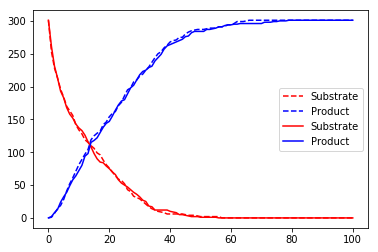

In [12]:
plt.plot(dresults[0][:,0],dresults[0][:,1],'--r', label='Substrate')
plt.plot(dresults[0][:,0],dresults[0][:,4],'--b', label='Product')
plt.plot(results[0][:,0],results[0][:,1],'-r', label='Substrate')
plt.plot(results[0][:,0],results[0][:,4],'-b', label='Product')
plt.plot([0],[11])
plt.legend(loc='best')